# 02 - Simple Linear Regression

<img width="200" src="https://i.imgur.com/hbPVe1T.png">

In [2]:
import tensorflow as tf
import numpy as np

tf.enable_eager_execution()

# Hypothesis and Cost

### Hypothesis
$$ H(x) = Wx + b $$

### Cost
$$ cost(W,b) = {{1}\over{m}} \sum_{i=1}^{m}{(H(x_i)-y_i)}^2 $$

(0, 8)

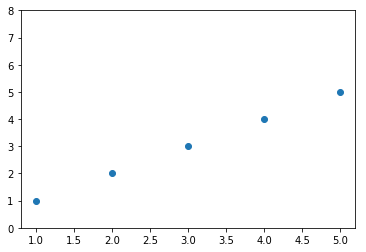

In [10]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)


## Hypothesis

In [11]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

W = tf.Variable(2.9)
b = tf.Variable(0.5)

# hypothesis = W*x +b
hypothesis = W*x_data+b

In [6]:
# Cost function
cost = tf.reduce_mean(tf.square(hypothesis-y_data))

In [7]:
#tf.reduce_mean() - calculate in reduce RANK(1->0)
v = [1., 2., 3., 4.]
tf.reduce_mean(v) # 2.5

<tf.Tensor: id=65, shape=(), dtype=float32, numpy=2.5>

In [8]:
#tf.square()
tf.square(3)

<tf.Tensor: id=68, shape=(), dtype=int32, numpy=9>

In [12]:
W.numpy(), b.numpy()

(2.9, 0.5)

In [13]:
hypothesis.numpy()

array([ 3.4     ,  6.3     ,  9.200001, 12.1     , 15.      ],
      dtype=float32)

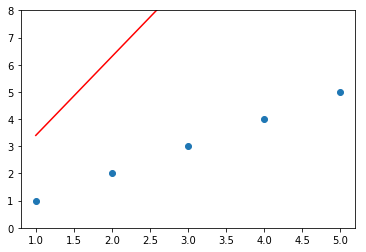

In [14]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)
plt.show()

## Cost

In [15]:
cost= tf.reduce_mean(tf.square(hypothesis - y_data))

In [17]:
with tf.GradientTape() as tape:
    hypothersis = W*x_data + b
    cost = tf.reduce_mean(tf.square(hypothersis - y_data))
    
W_grad, b_grad = tape.gradient(cost, [W, b])
W_grad.numpy(), b_grad.numpy()

(44.800003, 12.400002)

## Parameter Update

In [18]:
learning_rate = 0.01
W.assign_sub(learning_rate*W_grad)
b.assign_sub(learning_rate*b_grad)

W.numpy(), b.numpy()

(2.4520001, 0.376)

(0, 8)

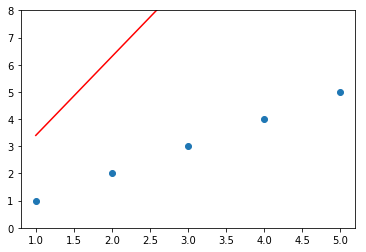

In [20]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)

## 여러 번 반복

0.000000|    2.4520|    0.3760| 45.660004
10.000000|    1.1036|    0.0034|  0.206336
20.000000|    1.0128|   -0.0209|  0.001026
30.000000|    1.0065|   -0.0218|  0.000093
40.000000|    1.0059|   -0.0212|  0.000083
50.000000|    1.0057|   -0.0205|  0.000077
60.000000|    1.0055|   -0.0198|  0.000072
70.000000|    1.0053|   -0.0192|  0.000067
80.000000|    1.0051|   -0.0185|  0.000063
90.000000|    1.0050|   -0.0179|  0.000059


(0, 8)

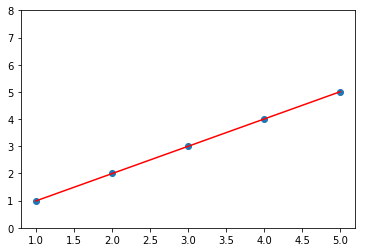

In [29]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)

for i in range(100):
    with tf.GradientTape() as tape:
        hypothesis = W*x_data+b
        cost = tf.reduce_mean(tf.square(hypothesis-y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    if i%10 == 0:
        print("{:5f}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.ylim(0, 8)

## Predict

In [31]:
print(W*5+b)
print(W*2.5+b)

tf.Tensor(5.0066934, shape=(), dtype=float32)
tf.Tensor(2.4946523, shape=(), dtype=float32)


## 전체코드

In [32]:
import tensorflow as tf
import numpy as np
tf.enable_eager_execution()

# Data
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

# W, b initialize
W = tf.Variable(2.9)
b = tf.Variable(0.5)

# W, b update
for i in range(100):
    # Gradient descent
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    if i % 10 == 0:
      print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

print()

# predict
print(W * 5 + b)
print(W * 2.5 + b)

    0|    2.4520|    0.3760| 45.660004
   10|    1.1036|    0.0034|  0.206336
   20|    1.0128|   -0.0209|  0.001026
   30|    1.0065|   -0.0218|  0.000093
   40|    1.0059|   -0.0212|  0.000083
   50|    1.0057|   -0.0205|  0.000077
   60|    1.0055|   -0.0198|  0.000072
   70|    1.0053|   -0.0192|  0.000067
   80|    1.0051|   -0.0185|  0.000063
   90|    1.0050|   -0.0179|  0.000059

tf.Tensor(5.0066934, shape=(), dtype=float32)
tf.Tensor(2.4946523, shape=(), dtype=float32)
